In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Child Langmuir law

In [2]:
def child_langmuir(U, d_extr):
    """
    Computes the child langmuir law for extraction voltage U in kV and
    extraction gap d_extr with in mm.
    Returns in units of A * m-2
    """
    # Child Langmuir law
    eps_0 = 8.854187812e-12 # F/m = s4 A2 m-2 kg-1
    Z = 1  # deuterium charge state

    mu = 1.6605390401e-27 # Unified atomic mass 
    m = 2.013553212745 * mu # Deuteron mass kg

    e = 1.60217662081e-19 # electron charge C
    
    return (4/9) * eps_0 * \
        np.sqrt( (2*Z*e) / (m) ) * (1/(d_extr**2)) * (U**(3/2)) # A/m



## Investigation of extraction electrode distance and voltage

In [7]:
U = np.asarray([1, 2, 3, 4, 5], dtype=int) * 1e3 # V
# U = np.linspace(1, 5, 100) * 1e3 # V
# at 10 mm extraction offset (back side of electrode, front side target)
# the true offset is 6.4 mm, so the difference is 3.6 mm
d = (np.arange(8, 16, 1))  # offset, mm
d = (np.linspace(8, 16, 100))  # offset, mm
d_extr = (d - 3.6)*1e-3  # gap width, m

d_aperture =  1 # extraction aperture diameter, mm
A_aperture = (np.pi * (0.5*d_aperture*1e-3)**2) # aperture in m2
# I =child_langmuir(U, d_extr)= # current in mA
js = np.zeros([d_extr.shape[0], U.shape[0]]) # current density in A/m2
for ii in range(len(d_extr)):
    js[ii] = child_langmuir(U, d_extr[ii])
    
Is = js*A_aperture*1e3 # current in mA
data = pd.DataFrame(Is)
# for jj in range(Is.shape[0]):
#     lbl = d[jj] # offset in mm 
#     plt.plot(U/1000, Is[jj], label=lbl)
# plt.legend(title='Offset front to electrode')
# plt.xlabel('Extraction voltage [-kV]')
# plt.ylabel('Extractable ion current [mA]')
# plt.show()

data.columns = U/1000 # extraction voltages in -kV
data.index = d # extraction electrode offsets in mm


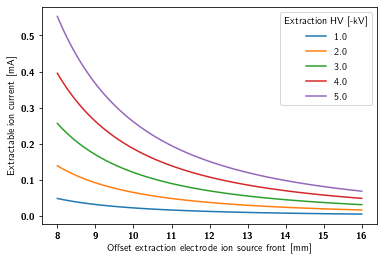

In [8]:
data.plot(kind='line')
plt.xlabel('Offset extraction electrode ion source front [mm]')
plt.ylabel('Extractable ion current [mA]')
plt.legend(title='Extraction HV [-kV]')
plt.show()

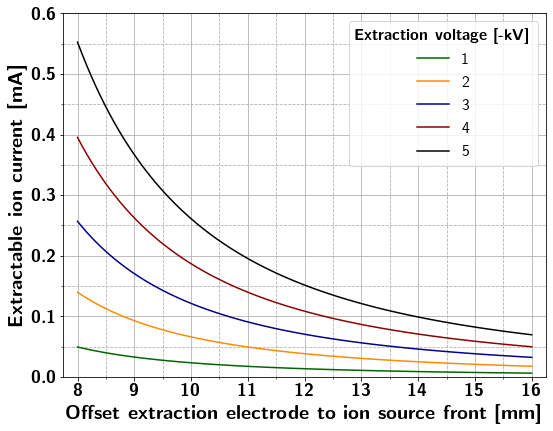

In [43]:
outfolder = '/Users/hkromer/polybox/Thesis/Chapters/FurtherNeutronGeneratorUpgrades/Figures/Child_Langmuir_with_extraction_no_suppression'
main_figname = 'Child_Langmuir_with_extraction_no_suppression'

from matplotlib.ticker import NullFormatter
from matplotlib import pyplot, transforms
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
import copy
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# plot for each time
fig, ax1 = plt.subplots(figsize=(8, 6))
fs = 20

colors = ['darkgreen', 'darkorange', 'darkblue', 'darkred', 'black']
data.plot(kind='line', ax=ax1, color=colors)


ax1.set_xlabel(r"\textbf{Offset extraction electrode to ion source front [mm]}", fontsize=fs)
ax1.set_ylabel(r"\textbf{Extractable ion current [mA]}", fontsize=fs)

ax1.tick_params(axis='y', labelsize=fs-2)
ax1.tick_params(axis='x', labelsize=fs-2)
# ax1.set_ylim(6, 9.5)
# ax1.set_xlim(10, 140)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

my_handles, my_labels = ax1.get_legend_handles_labels()

my_labels = [str(int(float(l))) for l in my_labels]
# my_handles = [my_handles[0], my_handles[1], my_handles[2]]
# my_labels = ['90', '100', '120']
# l1 = plt.legend(my_handles, my_labels, loc=(0.56, 0.75), markerscale=0, fontsize=14)
# l2 = plt.legend(handles=legend_elements,loc=(0.31, 0.81), handlelength=0, fontsize=14)
l2 = plt.legend(my_handles, my_labels, loc='upper right', fontsize=fs-4)
l2.set_title(r"\textbf{Extraction voltage [-kV]}", prop = {'size': fs-4})

# plt.gca().add_artist(l1)



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')


ax1.set_xticks(np.arange(8,17,1))
# plt.ylim(0, 6)
# plt.xlim(0.75,5.255)
plt.tight_layout()
plt.xlim(7.75, 16.25)
plt.ylim(0, 0.6)
plt.savefig(f"{outfolder}/{main_figname}.pdf")
plt.show()


In [53]:
I_10 = data.loc[:, 3.0].loc[(data.index > 9.9) & (data.index < 10.1)].mean() # mA
I_9 = data.loc[:, 3.0].loc[(data.index > 8.9) & (data.index < 9.1)].mean() # mA
d_I = np.abs(I_10-I_9)
rel_d_I = d_I/I_10
print(f"Relative increase in beam current from 10 to 9 mm offset {rel_d_I}")

I_10 = data.loc[:, 3.0].loc[(data.index > 10.9) & (data.index < 11.1)].mean() # mA
I_9 = data.loc[:, 3.0].loc[(data.index > 9.9) & (data.index < 10.1)].mean() # mA
d_I = np.abs(I_10-I_9)
rel_d_I = d_I/I_10
print(f"Relative increase in beam current from 11 to 10 mm offset {rel_d_I}")

Relative increase in beam current from 10 to 9 mm offset 0.39066818084732224
Relative increase in beam current from 11 to 10 mm offset 0.34156444551537624


In [72]:
df = data.loc[(data.index > 9.94) & (data.index < 10.1)].T
df.columns = ['+0']
df['-1'] = df['+0'].shift(1)
df['diff'] = df['+0']-df['-1']
df['rel_diff'] = df['diff']/df['+0']
df

,+0,-1,diff,rel_diff
1.0,0.023213,NaN,NaN,NaN
2.0,0.065655,0.023213,0.042442,0.646447
3.0,0.120616,0.065655,0.054961,0.455669
4.0,0.185700,0.120616,0.065084,0.350481
5.0,0.259524,0.185700,0.073824,0.284458


In [71]:
(0.120616-0.065655)/0.120616

0.4556692312794322

# Maurico benchmark

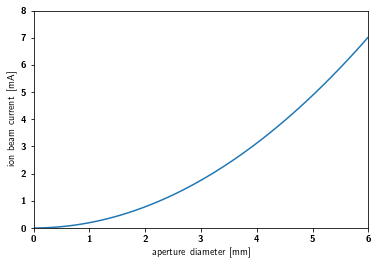

In [25]:
# mauricio
d_a = 1 # diameter, mm
ap = (np.pi * (0.5*d_a*1e-3)**2) # aperture m2
d_s = 70*1e-3 # shroud distance, m

U = 100e3 # V 


j = child_langmuir(U, d_s)# current density in A per m2
d_as = np.linspace(0,7,100) # aperture diameter in mm
ap = (np.pi * (0.5*d_as*1e-3)**2) # aperture m2

Is = j*ap*1e3 # beam current in mA
plt.plot(d_as, Is)
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.xlabel('aperture diameter [mm]')
plt.ylabel('ion beam current [mA]')

plt.show()

# Without suppression

In [35]:
# mauricio
d_a = 1. # diameter, mm
ap = (np.pi * (0.5*d_a*1e-3)**2) # aperture m2
d_s = 72.94*1e-3 # shroud distance, m

U = 100e3 # V 


j = child_langmuir(U, d_s)# current density in A per m2
# d_as = np.linspace(0,7,100) # aperture diameter in mm
# ap = (np.pi * (0.5*d_as*1e-3)**2) # aperture m2

Is = j*ap*1e3 # beam current in mA
Is, Is+Is*0.054

(0.1798409827547884, 0.189552395823547)

In [32]:
0.2/3.7

0.05405405405405406